Orientations: [120. 150.]
z1m 16.17
Number Correct with 1D Mean-Based 1 =  78
z2m 16.03
Number Correct with 1D Mean-Based 2 =  66
Number Correct with Mean-Based =  81
R1 [[1.         0.15273997]
 [0.15273997 1.        ]] R2 [[1.         0.16315068]
 [0.16315068 1.        ]]
Number Correct with Fisher-Based =  84
Number Correct with 112D Fisher-Based =  100


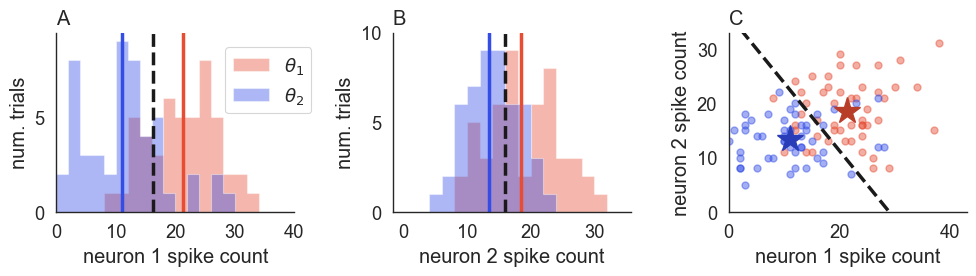

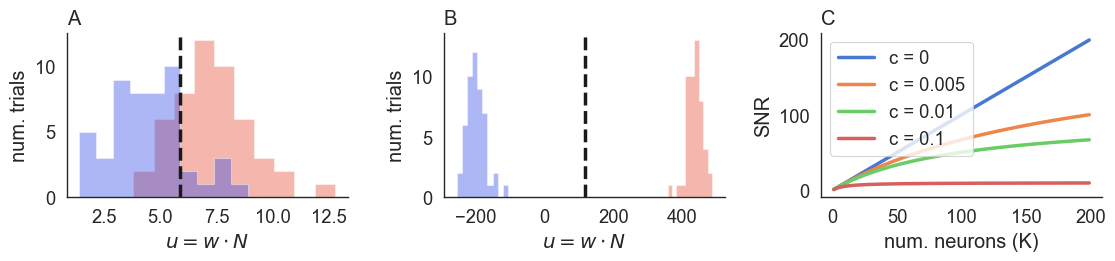

In [1]:
###############################################
## Import packages and specify some settings ##
###############################################
# Import packages
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# This makes plots show up and look nice
%matplotlib inline
sns.set(context='paper',style='white',font_scale=1.5,rc={"lines.linewidth":2.5})
sns.set_palette('muted')

###############################################
###############################################



# Load the data from a file
try: 
    data = np.load('../CodeFromBook/DataFiles/SpikeCounts2Neurons2Thetas.npz', allow_pickle=True)
except:
    url = "https://raw.githubusercontent.com/RobertRosenbaum/ModelingNeuralCircuits/master/CodeFromBook/DataFiles/SpikeCounts2Neurons2Thetas.npz"
    file = np.DataSource().open(url)
    data = np.load(file.name, allow_pickle=True)
    



# Extract the data from the data dictionary to arrays.
SpikeCounts=data['SpikeCounts']
TwoOrs=data['TwoOrs']

print('Orientations:',TwoOrs)

NumTrials=np.shape(SpikeCounts)[2]

mu1=np.mean(SpikeCounts[:,0,:], axis=1)
mu2=np.mean(SpikeCounts[:,1,:], axis=1)

# 1D Mean-based LDA
z1mean=(mu1[0]+mu2[0])/2
print('z1m',z1mean)
Guesses1D1=(SpikeCounts[0,:,:]>z1mean).astype(int)
NumberCorrectMean1D1=np.sum(Guesses1D1[0,:]==0)+np.sum(Guesses1D1[1,:]==1)
NumberCorrectMean1D1=np.maximum(NumberCorrectMean1D1,100-NumberCorrectMean1D1)
print('Number Correct with 1D Mean-Based 1 = ',NumberCorrectMean1D1)

z2mean=(mu1[1]+mu2[1])/2
print('z2m',z2mean)
Guesses1D2=(SpikeCounts[1,:,:]>z2mean).astype(int)
NumberCorrectMean1D2=np.sum(Guesses1D2[0,:]==0)+np.sum(Guesses1D2[1,:]==1)
NumberCorrectMean1D2=np.maximum(NumberCorrectMean1D2,100-NumberCorrectMean1D2)
print('Number Correct with 1D Mean-Based 2 = ',NumberCorrectMean1D2)


# 2D Mean-based LDA
wmean=mu1-mu2
zmean=np.dot(wmean,(mu1+mu2)/2)


umean=np.tensordot(wmean,SpikeCounts,axes=(0,0))
GuessesMean=(umean<zmean).astype(int)
NumberCorrectMean=np.sum(GuessesMean[0,:]==0)+np.sum(GuessesMean[1,:]==1)
print('Number Correct with Mean-Based = ',NumberCorrectMean)



# Fisher's LDA
Sigma1=np.cov(SpikeCounts[:,0,:])
Sigma2=np.cov(SpikeCounts[:,1,:])
R1=np.corrcoef(SpikeCounts[:,0,:])
R2=np.corrcoef(SpikeCounts[:,1,:])
Sigma=(Sigma1+Sigma2)/2
wFisher=np.linalg.inv(Sigma)@(mu1-mu2)
zFisher=np.dot(wFisher,(mu1+mu2)/2)

print('R1',R1,'R2',R2)


uFisher=np.tensordot(wFisher,SpikeCounts,axes=(0,0))
GuessesFisher=(uFisher<zFisher).astype(int)
NumberCorrectFisher=np.sum(GuessesFisher[0,:]==0)+np.sum(GuessesFisher[1,:]==1)
print('Number Correct with Fisher-Based = ',NumberCorrectFisher)





# Make figure
clr1=[.9,.3,.2]#sns.color_palette()[0]
clr2=[.2,.3,.9]#sns.color_palette()[1]
clr3=[.5,.1,.5]
clr4=[.1,.5,.1]

plt.subplots(1,3,figsize=(10, 3))

plt.subplot(1,3,1)
bins0=np.arange(0,35,2)
plt.hist(SpikeCounts[0,0,:],bins0,label=r'$\theta_1$',color=clr1,alpha=0.4,histtype='stepfilled')
plt.hist(SpikeCounts[0,1,:],bins0,label=r'$\theta_2$',color=clr2,alpha=0.4,histtype='stepfilled')
plt.axvline(x=z1mean,color='k',linestyle='--')
plt.axvline(x=mu1[0],color=clr1)
plt.axvline(x=mu2[0],color=clr2)
plt.xlabel('neuron 1 spike count')
plt.ylabel('num. trials')
plt.xlim([0,40])
plt.yticks([0,5])
plt.legend(loc=(.71,.55))
plt.title('A',loc='left')
sns.despine()


plt.subplot(1,3,2)
plt.hist(SpikeCounts[1,0,:],bins0,label=r'$\theta_1=$'+str(TwoOrs[0].astype(int)),color=clr1,alpha=0.4,histtype='stepfilled')
plt.hist(SpikeCounts[1,1,:],bins0,label=r'$\theta_2=$'+str(TwoOrs[1].astype(int)),color=clr2,alpha=0.4,histtype='stepfilled')
plt.axvline(x=z2mean,color='k',linestyle='--')
plt.axvline(x=mu1[1],color=clr1)
plt.axvline(x=mu2[1],color=clr2)
plt.xlabel('neuron 2 spike count')
plt.ylabel('num. trials')
plt.yticks([0,5,10])
#plt.legend(loc=(.65,.55))
plt.title('B',loc='left')
sns.despine()




plt.subplot(1,3,3)
plt.plot(SpikeCounts[0,0,:],SpikeCounts[1,0,:],'.',color=clr1,markersize=10,alpha=.45,label=r'$\theta_1$')
plt.plot(SpikeCounts[0,1,:],SpikeCounts[1,1,:],'.',color=clr2,markersize=10,alpha=.45,label=r'$\theta_2$')
#plt.plot(np.array([mu1[0],mu2[0]]),np.array([mu1[1],mu2[1]]),'k')
#plt.plot(np.array([0, zmean/wmean[0]]),np.array([zmean/wmean[1], 0]),'k:')
plt.plot(np.array([0, zFisher/wFisher[0]]),np.array([zFisher/wFisher[1], 0]),'k--')
plt.plot(mu1[0],mu1[1],'*',color=np.array(clr1)*.8,markersize=20)
plt.plot(mu2[0],mu2[1],'*',color=np.array(clr2)*.8,markersize=20)
plt.xlim([0,np.max(SpikeCounts)+5])
plt.ylim([0,np.max(SpikeCounts)-5])
plt.xlabel('neuron 1 spike count')
plt.ylabel('neuron 2 spike count')
#plt.legend(loc=(.5,.2))
plt.title('C',loc='left')
sns.despine()


plt.tight_layout()


####


plt.subplots(1,3,figsize=(12*.95, 3*.95))

plt.subplot(1,3,1)
plt.hist(uFisher[0,:],bins=10,label=r'$\theta_1=$'+str(TwoOrs[0].astype(int)),color=clr1,alpha=0.4,histtype='stepfilled')
plt.hist(uFisher[1,:],bins=10,label=r'$\theta_2=$'+str(TwoOrs[1].astype(int)),color=clr2,alpha=0.4,histtype='stepfilled')
plt.axvline(x=zFisher,color='k',linestyle='--')
plt.xlabel(r'$u=w\cdot N$')
plt.ylabel('num. trials')
plt.yticks([0,5,10])
# plt.legend(loc=(.65,.55))
plt.title('A',loc='left')
sns.despine()


### 112 Neurons


# Load the data from a file
try: 
    data = np.load('../CodeFromBook/DataFiles/SpikeCounts112Neurons2Thetas.npz', allow_pickle=True)
except:
    url = "https://raw.githubusercontent.com/RobertRosenbaum/ModelingNeuralCircuits/master/CodeFromBook/DataFiles/SpikeCounts112Neurons2Thetas.npz"
    file = np.DataSource().open(url)
    data = np.load(file.name, allow_pickle=True)
    


# Extract the data from the data dictionary to arrays.
SpikeCounts=data['SpikeCounts']

mu1=np.mean(SpikeCounts[:,0,:], axis=1)
mu2=np.mean(SpikeCounts[:,1,:], axis=1)
Sigma1=np.cov(SpikeCounts[:,0,:])
Sigma2=np.cov(SpikeCounts[:,1,:])
R1=np.corrcoef(SpikeCounts[:,0,:])
R2=np.corrcoef(SpikeCounts[:,1,:])
Sigma=(Sigma1+Sigma2)/2
wFisher=np.linalg.pinv(Sigma)@(mu1-mu2)
zFisher=np.dot(wFisher,(mu1+mu2)/2)
uFisher=np.tensordot(wFisher,SpikeCounts,axes=(0,0))
GuessesFisher=(uFisher<zFisher).astype(int)
NumberCorrectFisher=np.sum(GuessesFisher[0,:]==0)+np.sum(GuessesFisher[1,:]==1)
print('Number Correct with 112D Fisher-Based = ',NumberCorrectFisher)


plt.subplot(1,3,2)
plt.hist(uFisher[0,:],bins=10,label=r'$\theta_1=$'+str(TwoOrs[0].astype(int)),color=clr1,alpha=0.4,histtype='stepfilled')
plt.hist(uFisher[1,:],bins=10,label=r'$\theta_2=$'+str(TwoOrs[1].astype(int)),color=clr2,alpha=0.4,histtype='stepfilled')
plt.axvline(x=zFisher,color='k',linestyle='--')
plt.xlabel(r'$u=w\cdot N$')
plt.ylabel('num. trials')
plt.yticks([0,5,10])
#plt.legend(loc=(.65,.55))
plt.title('B',loc='left')
sns.despine()

def cu(K,c,dN=1):
    return dN/(c+(1-c)/K)
def varu(K,c,sigma=1):
 return c*sigma**2+((1-c)*sigma**2)/K
Ks=np.arange(1,200,1)
cs=np.array([0,.005,.01,.1])

plt.subplot(1,3,3)
for c in cs:
    if c==0:
        s=str(int(c))
    else:
        s=str(c)
    plt.plot(Ks,cu(Ks,c),label='c = '+s)
plt.legend()
plt.xlabel('num. neurons (K)')
plt.ylabel('SNR')
plt.title('C',loc='left')
sns.despine()

plt.tight_layout()




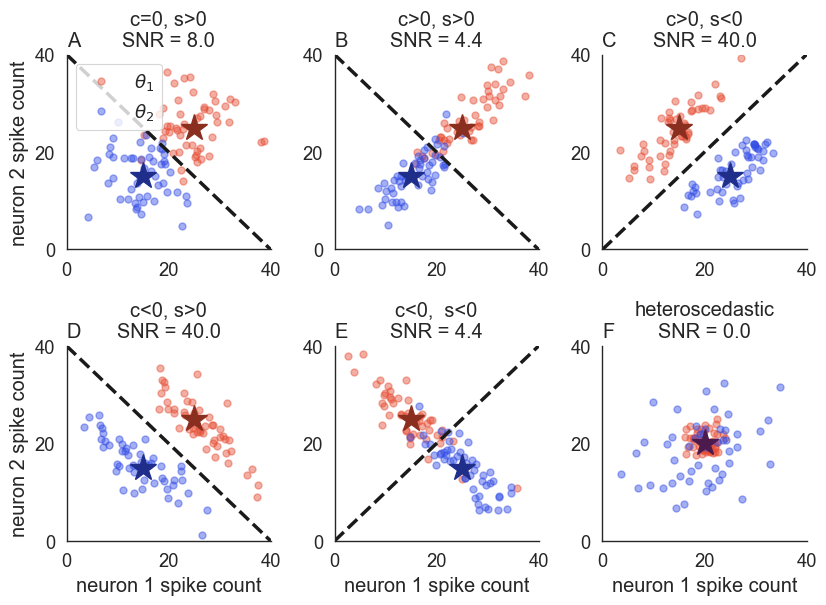

In [3]:

numsamples=50
axlims=[0,40]
sigma=5
cval=.8
mup=25
mum=15

plt.subplots(2,3,figsize=(10*.85,7.4*.85))

mu1=np.array([mup,mup])
mu2=np.array([mum,mum])
c=0
Sigma=np.array([[sigma**2,c*sigma**2],[c*sigma**2,sigma**2]])
wFisher=np.linalg.inv(Sigma)@(mu1-mu2)
zFisher=np.dot(wFisher,(mu1+mu2)/2)
SNR=(mu2-mu1)@(np.linalg.inv(Sigma)@(mu2-mu1))
N1=np.random.multivariate_normal(mu1,Sigma,size=(numsamples)).T
N2=np.random.multivariate_normal(mu2,Sigma,size=(numsamples)).T
plt.subplot(2,3,1)
plt.plot(N1[0,:],N1[1,:],'.',color=clr1,markersize=10,alpha=.45,label=r'$\theta_1$')
plt.plot(N2[0,:],N2[1,:],'.',color=clr2,markersize=10,alpha=.45,label=r'$\theta_2$')
plt.plot(np.array([0, zFisher/wFisher[0]]),np.array([zFisher/wFisher[1], 0]),'k--')
plt.plot(mu1[0],mu1[1],'*',color=np.array(clr1)*.6,markersize=20)
plt.plot(mu2[0],mu2[1],'*',color=np.array(clr2)*.6,markersize=20)
plt.ylim(axlims)
plt.xlim(axlims)
plt.legend()
plt.xticks([0,20,40])
plt.yticks([0,20,40])
#plt.xlabel('neuron 1 spike count')
plt.ylabel('neuron 2 spike count')
plt.title('A',loc='left')
plt.title('c=0, s>0'+'\nSNR = {:1.1f}'.format(SNR))
sns.despine()

mu1=np.array([mup,mup])
mu2=np.array([mum,mum])
c=cval
Sigma=np.array([[sigma**2,c*sigma**2],[c*sigma**2,sigma**2]])
wFisher=np.linalg.inv(Sigma)@(mu1-mu2)
zFisher=np.dot(wFisher,(mu1+mu2)/2)
SNR=(mu2-mu1)@(np.linalg.inv(Sigma)@(mu2-mu1))
N1=np.random.multivariate_normal(mu1,Sigma,size=(numsamples)).T
N2=np.random.multivariate_normal(mu2,Sigma,size=(numsamples)).T
plt.subplot(2,3,2)
plt.plot(N1[0,:],N1[1,:],'.',color=clr1,markersize=10,alpha=.45,label=r'$\theta_1$')
plt.plot(N2[0,:],N2[1,:],'.',color=clr2,markersize=10,alpha=.45,label=r'$\theta_2$')
plt.plot(np.array([0, zFisher/wFisher[0]]),np.array([zFisher/wFisher[1], 0]),'k--')
plt.plot(mu1[0],mu1[1],'*',color=np.array(clr1)*.6,markersize=20)
plt.plot(mu2[0],mu2[1],'*',color=np.array(clr2)*.6,markersize=20)
plt.ylim(axlims)
plt.xlim(axlims)
plt.xticks([0,20,40])
plt.yticks([0,20,40])
#plt.xlabel('neuron 1 spike count')
#plt.ylabel('neuron 2 spike count')
plt.title('B',loc='left')
plt.title('c>0, s>0'+'\nSNR = {:1.1f}'.format(SNR))
sns.despine()


mu1=np.array([mum,mup])
mu2=np.array([mup,mum])
c=cval
Sigma=np.array([[sigma**2,c*sigma**2],[c*sigma**2,sigma**2]])
wFisher=np.linalg.inv(Sigma)@(mu1-mu2)
zFisher=np.dot(wFisher,(mu1+mu2)/2)
SNR=(mu2-mu1)@(np.linalg.inv(Sigma)@(mu2-mu1))
N1=np.random.multivariate_normal(mu1,Sigma,size=(numsamples)).T
N2=np.random.multivariate_normal(mu2,Sigma,size=(numsamples)).T
plt.subplot(2,3,3)
plt.plot(N1[0,:],N1[1,:],'.',color=clr1,markersize=10,alpha=.45,label=r'$\theta_1$')
plt.plot(N2[0,:],N2[1,:],'.',color=clr2,markersize=10,alpha=.45,label=r'$\theta_2$')
plt.plot(np.array([0, axlims[1]]),np.array([0,axlims[1]]),'k--')
plt.plot(mu1[0],mu1[1],'*',color=np.array(clr1)*.6,markersize=20)
plt.plot(mu2[0],mu2[1],'*',color=np.array(clr2)*.6,markersize=20)
plt.ylim(axlims)
plt.xlim(axlims)
plt.xticks([0,20,40])
plt.yticks([0,20,40])
#plt.xlabel('neuron 1 spike count')
#plt.ylabel('neuron 2 spike count')
plt.title('C',loc='left')
plt.title('c>0, s<0'+'\nSNR = {:1.1f}'.format(SNR))
sns.despine()


mu1=np.array([mup,mup])
mu2=np.array([mum,mum])
c=-cval
Sigma=np.array([[sigma**2,c*sigma**2],[c*sigma**2,sigma**2]])
wFisher=np.linalg.inv(Sigma)@(mu1-mu2)
zFisher=np.dot(wFisher,(mu1+mu2)/2)
SNR=(mu2-mu1)@(np.linalg.inv(Sigma)@(mu2-mu1))
N1=np.random.multivariate_normal(mu1,Sigma,size=(numsamples)).T
N2=np.random.multivariate_normal(mu2,Sigma,size=(numsamples)).T
plt.subplot(2,3,4)
plt.plot(N1[0,:],N1[1,:],'.',color=clr1,markersize=10,alpha=.45,label=r'$\theta_1$')
plt.plot(N2[0,:],N2[1,:],'.',color=clr2,markersize=10,alpha=.45,label=r'$\theta_2$')
plt.plot(np.array([0, zFisher/wFisher[0]]),np.array([zFisher/wFisher[1], 0]),'k--')
plt.plot(mu1[0],mu1[1],'*',color=np.array(clr1)*.6,markersize=20)
plt.plot(mu2[0],mu2[1],'*',color=np.array(clr2)*.6,markersize=20)
plt.ylim(axlims)
plt.xlim(axlims)
plt.xticks([0,20,40])
plt.yticks([0,20,40])
plt.xlabel('neuron 1 spike count')
plt.ylabel('neuron 2 spike count')
plt.title('D',loc='left')
plt.title('c<0, s>0'+'\nSNR = {:1.1f}'.format(SNR))
sns.despine()


mu1=np.array([mum,mup])
mu2=np.array([mup,mum])
c=-cval
Sigma=np.array([[sigma**2,c*sigma**2],[c*sigma**2,sigma**2]])
wFisher=np.linalg.inv(Sigma)@(mu1-mu2)
zFisher=np.dot(wFisher,(mu1+mu2)/2)
SNR=(mu2-mu1)@(np.linalg.inv(Sigma)@(mu2-mu1))
N1=np.random.multivariate_normal(mu1,Sigma,size=(numsamples)).T
N2=np.random.multivariate_normal(mu2,Sigma,size=(numsamples)).T
plt.subplot(2,3,5)
plt.plot(N1[0,:],N1[1,:],'.',color=clr1,markersize=10,alpha=.45,label=r'$\theta_1$')
plt.plot(N2[0,:],N2[1,:],'.',color=clr2,markersize=10,alpha=.45,label=r'$\theta_2$')
plt.plot(np.array([0, axlims[1]]),np.array([0,axlims[1]]),'k--')
plt.plot(mu1[0],mu1[1],'*',color=np.array(clr1)*.6,markersize=20)
plt.plot(mu2[0],mu2[1],'*',color=np.array(clr2)*.6,markersize=20)
plt.ylim(axlims)
plt.xlim(axlims)
plt.xticks([0,20,40])
plt.yticks([0,20,40])
plt.xlabel('neuron 1 spike count')
#plt.ylabel('neuron 2 spike count')
plt.title('E',loc='left')
plt.title('c<0,  s<0'+'\nSNR = {:1.1f}'.format(SNR))
sns.despine()



mu1=np.array([20,20])
mu2=np.array([20,20])
sigma1=.4*sigma
sigma2=1.5*sigma
Sigma1=np.array([[sigma1**2,0],[0,sigma1**2]])
Sigma2=np.array([[sigma2**2,0],[0,sigma2**2]])
wFisher=np.linalg.inv(Sigma)@(mu1-mu2)
zFisher=np.dot(wFisher,(mu1+mu2)/2)
SNR=(mu2-mu1)@(np.linalg.inv(Sigma)@(mu2-mu1))
N1=np.random.multivariate_normal(mu1,Sigma1,size=(numsamples)).T
N2=np.random.multivariate_normal(mu2,Sigma2,size=(numsamples)).T
plt.subplot(2,3,6)
plt.plot(N1[0,:],N1[1,:],'.',color=clr1,markersize=10,alpha=.45,label=r'$\theta_1$')
plt.plot(N2[0,:],N2[1,:],'.',color=clr2,markersize=10,alpha=.45,label=r'$\theta_2$')
#plt.plot(np.array([0, axlims[1]]),np.array([0,axlims[1]]),'k--')
plt.plot(mu1[0],mu1[1],'*',color=[.3,.1,.3],markersize=20)
#plt.plot(mu2[0],mu2[1],'*',color=np.array(clr2)*.6,markersize=20)
plt.ylim(axlims)
plt.xlim(axlims)
plt.xticks([0,20,40])
plt.yticks([0,20,40])
plt.xlabel('neuron 1 spike count')
#plt.ylabel('neuron 2 spike count')
plt.title('F',loc='left')
plt.title('heteroscedastic'+'\nSNR = {:1.1f}'.format(SNR))
sns.despine()

plt.tight_layout()

